In [1]:
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from google.colab import drive
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
drive.mount('/content/drive')
df=pd.read_csv('/content/drive/MyDrive/Auto2/Lab1/Cancer_Data.csv')
df

Mounted at /content/drive


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


**Problema?**
Se trata de un problema de clasificación, ya que se predice una categoria que es el tipo de tumor.


In [3]:
print("Columnas del dataset:", df.columns.tolist())
print("Primeras filas de diagnosis:", df['diagnosis'].head())
print("Distribución de clases en diagnosis:", df['diagnosis'].value_counts())
print("Proporciones:", df['diagnosis'].value_counts(normalize=True))

Columnas del dataset: ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32']
Primeras filas de diagnosis: 0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object
Distribución de clases en diagnosis: diagnosis
B    357
M    212
Name: count, dtype: int64
Proporciones: diagnosis
B    0.627417
M    0.372583
Name: proportion, dtype: float64


**Target**
El target de esta, seria la columa diagnosis, ya que la idea es predecir si es un tumor begnino o **maligno**, a partir de las otras caracteristicas y esto se guarda en la columna de diagnosis.

In [4]:
n_muestras = df.shape[0]
n_caracteristicas = df.shape[1]
tipos_datos = df.dtypes
n_variables_numericas = sum(tipos_datos.apply(lambda x: x == 'int64' or x == 'float64'))
n_variables_categoricas = n_caracteristicas - n_variables_numericas

print("Número de muestras:", n_muestras)
print("Número de características:", n_caracteristicas)
print("Número de variables numéricas:", n_variables_numericas)
print("Número de variables categóricas:", n_variables_categoricas)
print("Datos de cada columna:")
print(tipos_datos)

Número de muestras: 569
Número de características: 33
Número de variables numéricas: 32
Número de variables categóricas: 1
Datos de cada columna:
id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_wors

**Protocolo**
Breast Cancer Wisconsin: Los creadores de esta base de datos fue W. Nick Street, O.L Mangasarin y demás colaboradores en la Universidad de Wisconsin, donde estos tomaron muestras de tumones con FNA, digitalizaron las imagenes miscroscopicas de las celulas, extrajeron mediciones cuantitativas de sus nucleso y luego las etiquetaron como begninas o maliganas según diagnosticos medicos.

El protocolo para este estudio, fue el siguiente:
1.   Toma de muestras: Aspirado con aguja fina de masas mamarias.
2.   Preparacion: Montajes de portaobjetos, tincion para destacar nucleos celulares.
3. Digitalizacion: fotografia digital con microscopio con microscopio.
4. Features: Calculo de propiedades.
5. Etiquetado: Diagnostico realizado por especialistas patologicos.

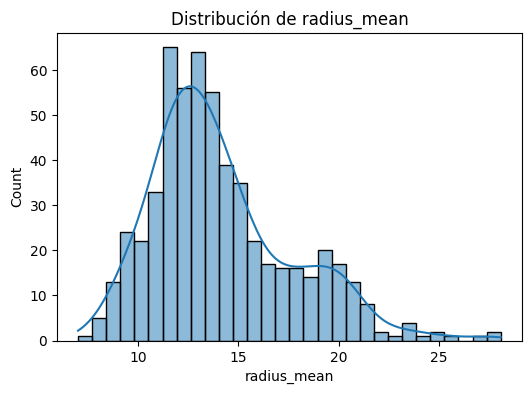

In [5]:
plt.figure(figsize=(6,4))
sns.histplot(df["radius_mean"], bins=30, kde=True)
plt.title("Distribución de radius_mean")
plt.show()

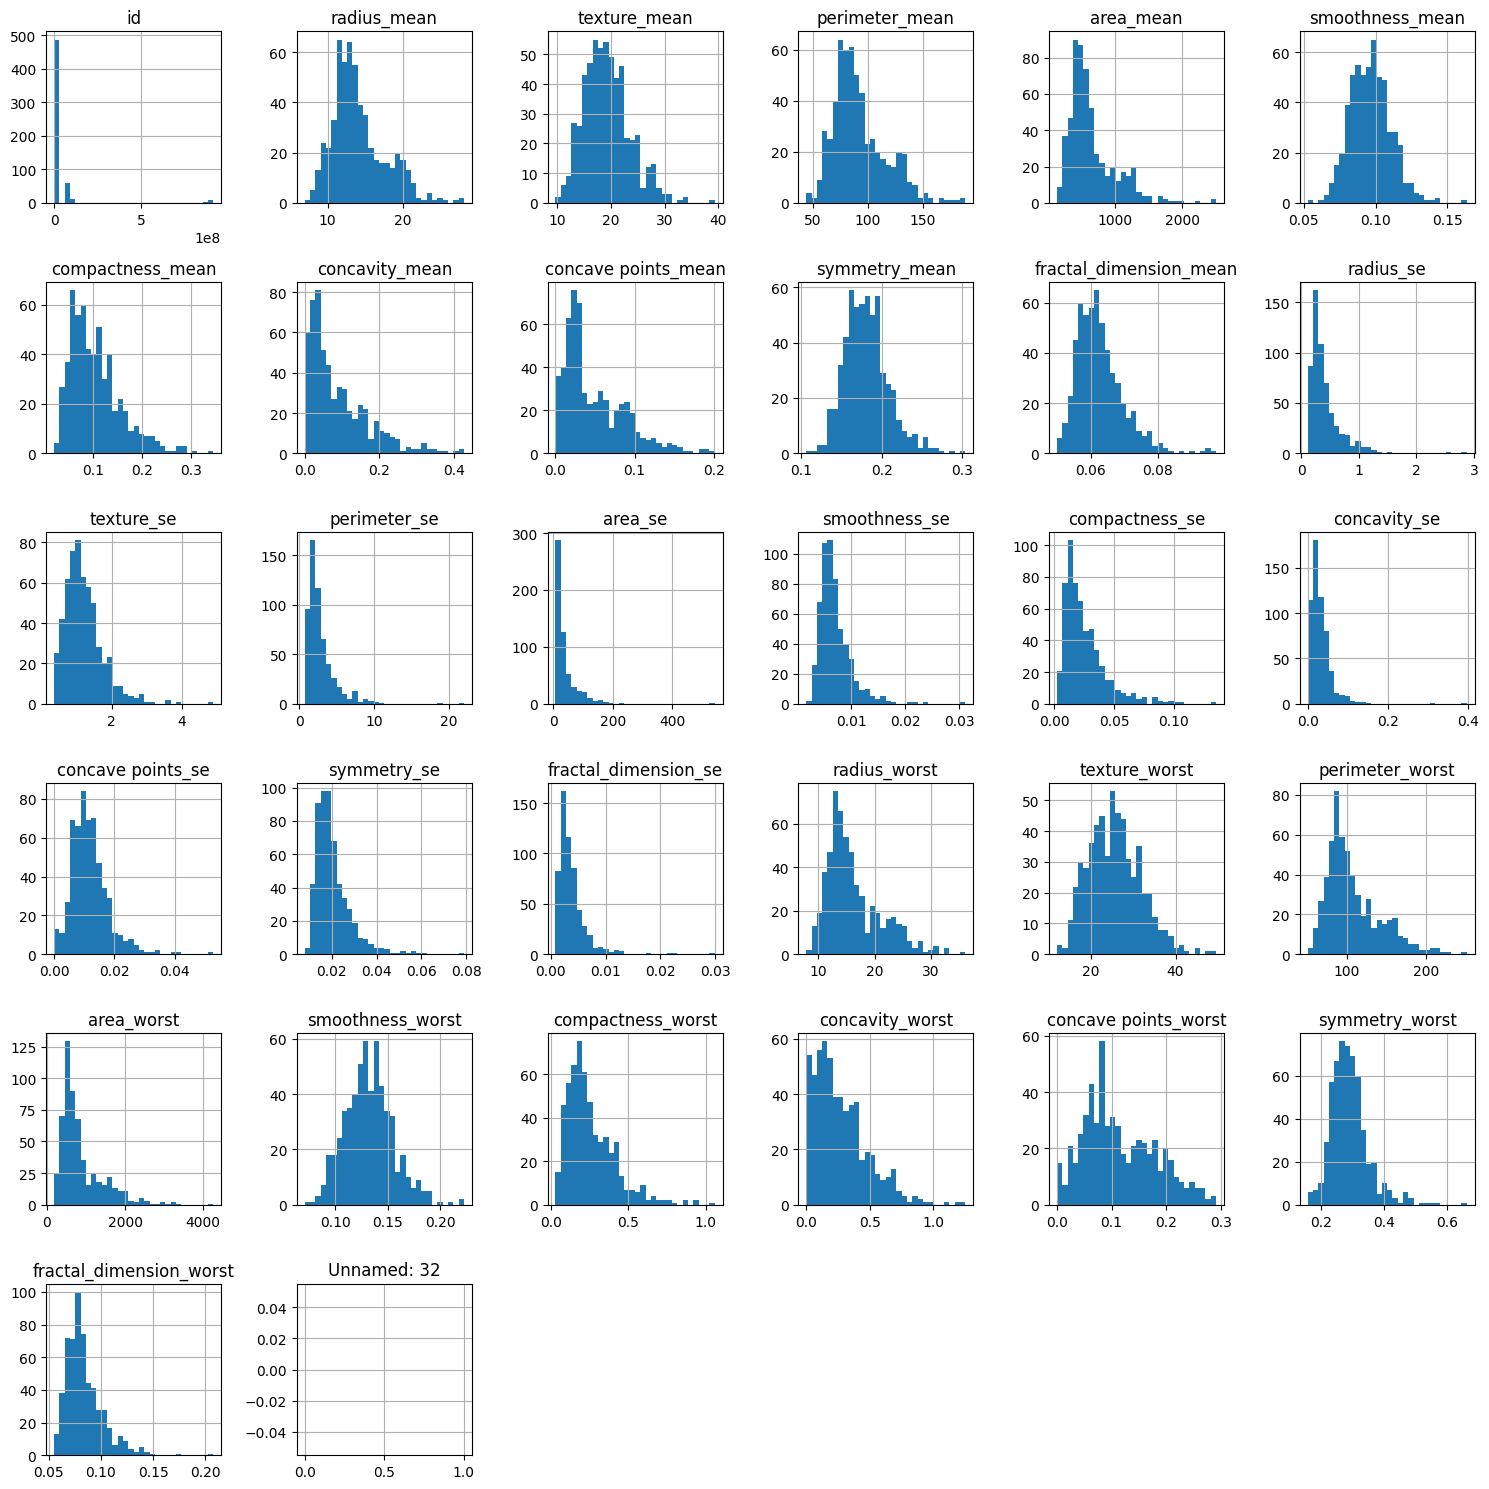

In [6]:
df.hist(figsize=(15,15), bins=30)
plt.tight_layout()
plt.show()

Descripción de los graficos:
id: No aporta nada al analisis, ya que la distribucion es muy dispersa. Por esta razón, se debe eliminar.


*   Radius mean: La distribucion es normal, los valores mas grandes estan asociadas a tumores malignos
*  Texture mean: Dispersa, indica variacion en la textura del los tejidos celulares.
*   Perimeter mean: Centrado, Los valores altos se relacionan con maligno.
*   Area mean: Sesgada.
*   Smoothness mean: Centrada.
*   Compactness mean: Ligeramente sesgada.
*   Concavity mean:
*   Concave points mean
*   Symmetry mean
*   Fractal dimension mean
*   radius se, texture se, perimeter se, area se: concentraciones con valores bajos
*  smoothness se: valores pequeños concentrados
*   compactness se, concavity se, concave points se: Sesgadas.
*   symmetry se, fractal dimension se: sin mucha dispersion, rangos bajos
*   radius worst, perimeter worst, area worst: valores altos
*   texture worst: mas dispersas que texture mean
*   smoothness worst, compactness worst,concavity worst,concave points worst: valores más extremos que en smoothness mean
*   symmetry worst, fractal dimension worst: mayor dispersion que symmetry mean


















In [7]:
descripcion = df.describe().T
print(descripcion.head(10))

                     count          mean           std         min  \
id                   569.0  3.037183e+07  1.250206e+08  8670.00000   
radius_mean          569.0  1.412729e+01  3.524049e+00     6.98100   
texture_mean         569.0  1.928965e+01  4.301036e+00     9.71000   
perimeter_mean       569.0  9.196903e+01  2.429898e+01    43.79000   
area_mean            569.0  6.548891e+02  3.519141e+02   143.50000   
smoothness_mean      569.0  9.636028e-02  1.406413e-02     0.05263   
compactness_mean     569.0  1.043410e-01  5.281276e-02     0.01938   
concavity_mean       569.0  8.879932e-02  7.971981e-02     0.00000   
concave points_mean  569.0  4.891915e-02  3.880284e-02     0.00000   
symmetry_mean        569.0  1.811619e-01  2.741428e-02     0.10600   

                              25%           50%           75%           max  
id                   869218.00000  906024.00000  8.813129e+06  9.113205e+08  
radius_mean              11.70000      13.37000  1.578000e+01  2.811000e+

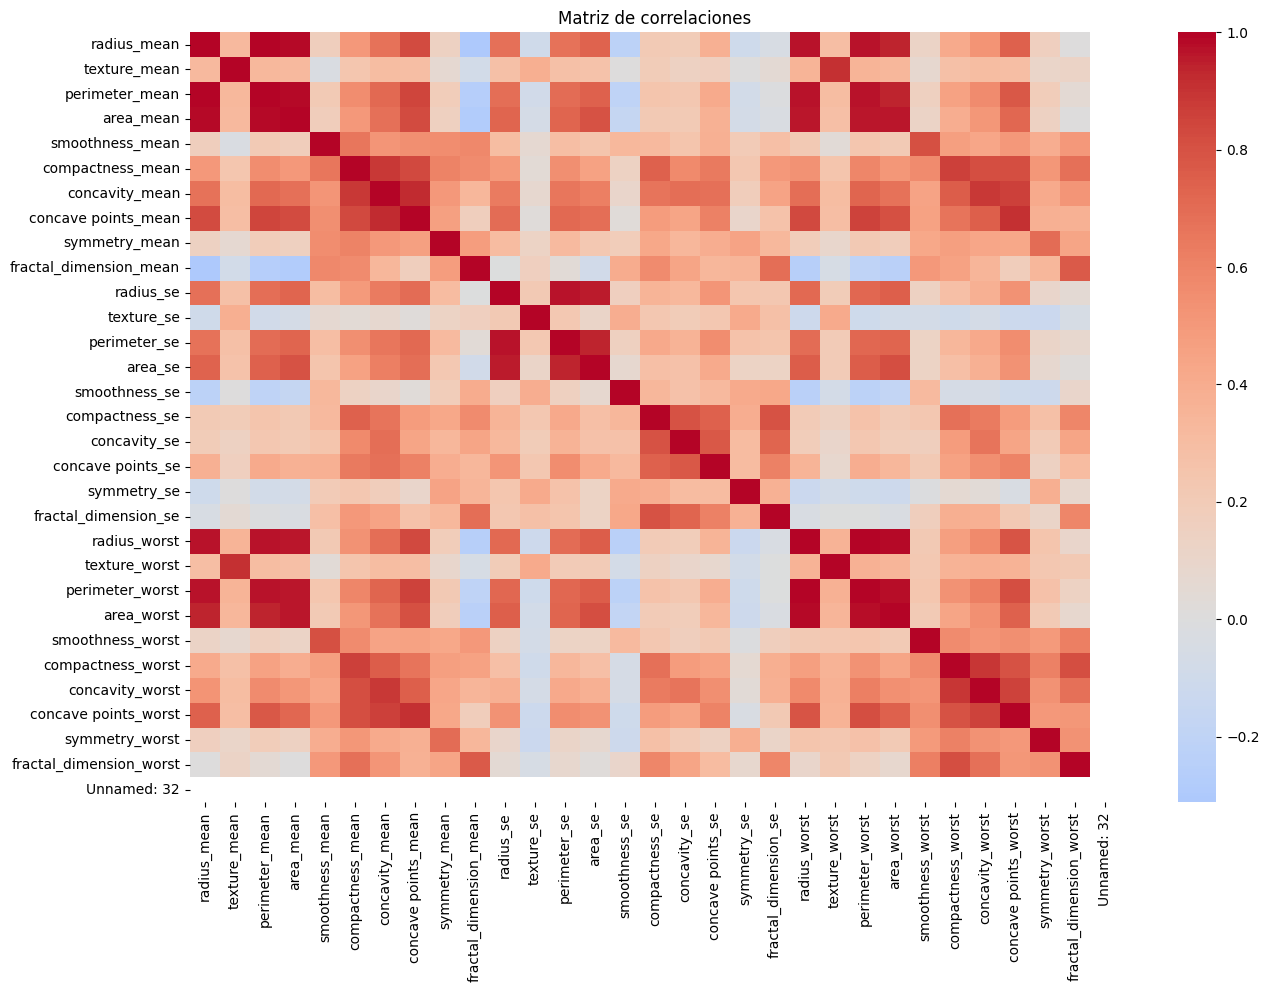

In [8]:
df_num = df.drop(columns=["diagnosis", "id"], errors="ignore")

plt.figure(figsize=(15,10))
sns.heatmap(df_num.corr(), cmap="coolwarm", center=0)
plt.title("Matriz de correlaciones")
plt.show()

**Matriz de correlación**

Esta revela que mcuhas de las varibles de este dataset están my relacionadas entre sí, especialmente aquellas de medidas geometricas del tumor como radio, perimetro, area y las que describen irregularidades como compactness, concavity y concave points. Lo que sugiere redudndacios en la informacion.

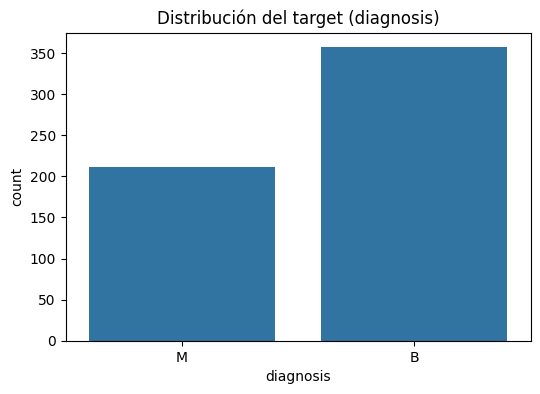

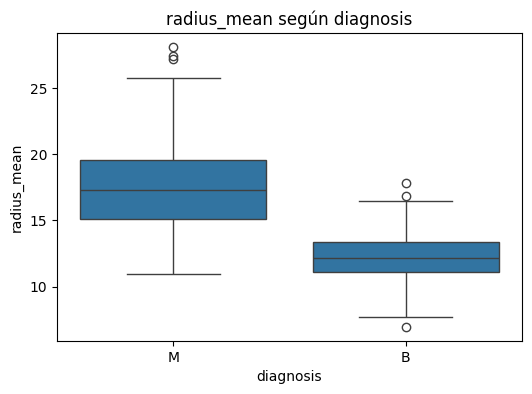

In [9]:
plt.figure(figsize=(6,4))
sns.countplot(x="diagnosis", data=df)
plt.title("Distribución del target (diagnosis)")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x="diagnosis", y="radius_mean", data=df)
plt.title("radius_mean según diagnosis")
plt.show()

En el gafico de conteo, muestra el balance esntre las clases de benigno y maligno.

El boxplot muestra que readius mean tiende a tener valores más altos en tumores malignos.

In [10]:
print(df.isna().sum())

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [11]:
df = df.drop(columns=["id", "Unnamed: 32"], errors="ignore")
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [12]:
from sklearn.preprocessing import LabelEncoder

etiqueta = LabelEncoder()
df["diagnosis"] = etiqueta.fit_transform(df["diagnosis"])
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [13]:
X = df.drop(columns=["diagnosis"])
y = df["diagnosis"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
X = df.drop(columns=["diagnosis", "id", "Unnamed: 32"], errors="ignore") #variable
y = df["diagnosis"] #target

#70/30
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, stratify=y, random_state=42
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, stratify=y_temp, random_state=42 #Se divide en 30, 15 y 15
)

print("Train:", X_train.shape, "Val:", X_val.shape, "Test:", X_test.shape)

Train: (398, 30) Val: (85, 30) Test: (86, 30)


In [15]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(max_iter=2000))
])
pipe.fit(X_train, y_train)
yval_pred = pipe.predict(X_val)
yval_proba = pipe.predict_proba(X_val)[:,1]

print("Acc:", accuracy_score(y_val, yval_pred))
print("F1:", f1_score(y_val, yval_pred))
print("ROC AUC:", roc_auc_score(y_val, yval_proba))

Acc: 0.9647058823529412
F1: 0.9508196721311475
ROC AUC: 0.9964622641509434


**Justificación: Pipeline y division**

Desde scikit-lear, se implementó un pipeline (secuencia de etapas o procesos conectados donde la salida de uno es la entrada del siguiente, utilizada para procesar datos, automatizar flujos de trabajo o gestionar procesos como ventas, innovación o desarrollo de software) que incluye sandardScaler y un modelo de regresion logistica.

En cuanto la división, 70% para el entrenamiento, 15% para validación y 15% para la prueba., ya que estas proporciones ofrecen un balance adecuado entre cantidad de datos para entrenar y y el resto para validar y probar.

In [16]:
def evModelo(nombre, modelo, X_train, y_train, X_val, y_val, X_test, y_test):
    modelo.fit(X_train, y_train)

    resultados = {}
    for split, (X, y) in {
        "train": (X_train, y_train),
        "val": (X_val, y_val),
        "test": (X_test, y_test),
    }.items():
        y_pred = modelo.predict(X)
        y_proba = modelo.predict_proba(X)[:,1] if hasattr(modelo, "predict_proba") else y_pred
        resultados[f"{split}_acc"] = accuracy_score(y, y_pred)
        resultados[f"{split}_f1"] = f1_score(y, y_pred)
        resultados[f"{split}_auc"] = roc_auc_score(y, y_proba)
    return pd.Series(resultados, name=nombre)


#kNN, Ensamble, DNN
modelos = [
    ("kNN", KNeighborsClassifier(n_neighbors=5)),
    ("RandomForest", RandomForestClassifier(n_estimators=200, random_state=42)),
    ("DNN", MLPClassifier(hidden_layer_sizes=(64,32,16),
                          activation="relu",
                          solver="adam",
                          alpha=0.001,
                          max_iter=500,
                          random_state=42))
]

#Evaluación
resultados = pd.concat([
    evModelo(nombre, modelo, X_train, y_train, X_val, y_val, X_test, y_test)
    for nombre, modelo in modelos
], axis=1).T

print(resultados)


              train_acc  train_f1  train_auc   val_acc    val_f1   val_auc  \
kNN            0.942211  0.920962   0.989946  0.917647  0.881356  0.953715   
RandomForest   1.000000  1.000000   1.000000  0.964706  0.950820  0.992925   
DNN            0.939698  0.913669   0.977973  0.905882  0.857143  0.984080   

              test_acc   test_f1  test_auc  
kNN           0.941860  0.915254  0.967303  
RandomForest  0.976744  0.967742  0.997685  
DNN           0.930233  0.896552  0.979167  


El mejor desempeño lo tuvo RandomForest ya que logra mejores metricas en validacion y prueba, el accuracy, F1 y AUC son más altos, sin embargo este muestra un overfitting, en el entrenamiento este muestra un 1.0 en todas sus metricas pero en validacion y test, estas bajan un poco pero sigue siendo muy alto.

El DNN muestra underfitting, lo cual no alcanza a aprender lo suficiente, incluso en el train.

El random forest seria la eleccion produccion, ya que tiene el mejor balance en validacion y test, distingue casi perfectamente entre clases y es mas estable entre kNN y DNN.

A pesar de que Random Forest presenta overfitting, sigue siendo el mejor tanto por desepeño en general como por mayor capacidad en la validacion y en la prueba.

In [17]:
print(X.columns)

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [25]:
#Esto seria el ejemplo tanto para tumor beningo como maligno CON VALORES INVENTADOOOS
caracteristicas = X.columns
muestra_maligna = {
    'radius_mean': 20.0,
    'texture_mean': 30.0,
    'perimeter_mean': 140.0,
    'area_mean': 1200.0,
    'smoothness_mean': 0.15,
    'compactness_mean': 0.25,
    'concavity_mean': 0.30,
    'concave points_mean': 0.15,
    'symmetry_mean': 0.30,
    'fractal_dimension_mean': 0.09,

    'radius_se': 1.0,
    'texture_se': 2.0,
    'perimeter_se': 10.0,
    'area_se': 100.0,
    'smoothness_se': 0.02,
    'compactness_se': 0.05,
    'concavity_se': 0.08,
    'concave points_se': 0.03,
    'symmetry_se': 0.04,
    'fractal_dimension_se': 0.01,

    'radius_worst': 25.0,
    'texture_worst': 40.0,
    'perimeter_worst': 180.0,
    'area_worst': 2000.0,
    'smoothness_worst': 0.20,
    'compactness_worst': 0.35,
    'concavity_worst': 0.40,
    'concave points_worst': 0.20,
    'symmetry_worst': 0.35,
    'fractal_dimension_worst': 0.12
}

muestra_benigna = {
    'radius_mean': 10.0,
    'texture_mean': 12.0,
    'perimeter_mean': 70.0,
    'area_mean': 300.0,
    'smoothness_mean': 0.08,
    'compactness_mean': 0.05,
    'concavity_mean': 0.02,
    'concave points_mean': 0.01,
    'symmetry_mean': 0.15,
    'fractal_dimension_mean': 0.05,

    'radius_se': 0.2,
    'texture_se': 0.8,
    'perimeter_se': 2.0,
    'area_se': 15.0,
    'smoothness_se': 0.004,
    'compactness_se': 0.01,
    'concavity_se': 0.01,
    'concave points_se': 0.005,
    'symmetry_se': 0.01,
    'fractal_dimension_se': 0.002,

    'radius_worst': 12.0,
    'texture_worst': 15.0,
    'perimeter_worst': 85.0,
    'area_worst': 400.0,
    'smoothness_worst': 0.09,
    'compactness_worst': 0.07,
    'concavity_worst': 0.05,
    'concave points_worst': 0.02,
    'symmetry_worst': 0.18,
    'fractal_dimension_worst': 0.06
}

df_muestras = pd.DataFrame([muestra_maligna, muestra_benigna], index=["Muestra Maligna", "Muestra Benigna"], columns=caracteristicas)

predicciones = pipe.predict(df_muestras)
probabilidades = pipe.predict_proba(df_muestras)

print("Predicciones:", predicciones)       # 0 = Benigno, 1 = Maligno
print("Probabilidades:\n", probabilidades)

Predicciones: [1 0]
Probabilidades:
 [[2.49681387e-10 1.00000000e+00]
 [9.99996687e-01 3.31329896e-06]]


Siguiendo este resultado, el primer parametro de "Prediciones" seria de muestra maligna que se clasifica como "1" y la segunda, seria muestra benigna que se clasifica como "0".

"Probabilidades" lo tomamos como: [[2.49681387e-10 1.00000000e+00] 100% maligno y [9.99996687e-01 3.31329896e-06]] 99.9% beningo.

Siguiendo este orden de ideas, el resultado tiene sentido. El modelo fue entrenado a partir de ejemplos donde los tumores con mayores tamaño y mayor irregularidad estan generalmente asociados a maligno.

Si se modifica una o mas variables, el efecto dependerá de que variables y la cantidad que se cambiarian. Al aumentar variables como tamaño e irregularidad, aumenta probabilidad de maligno. Al igual que si se reducen los parametros de otras variables, se producen el efecto cntrario y así sucesivamente.

Muchos de los rasgos estan relacionados, por esto cambiar las variables, tendran efectos diferentes.


**K-Fold cross validation**
Es una tecnica estadistica utilizada en el aprendizaje automatica que consistete en dividir un conjunto de datos en k subconjuntos diferentes, despues estos subconjuntos se evaluan k veces, obteniendo así coeficientes de rendimientos de manera individual en cada interacion, para así obtener una ponderacion del rendimiento general del modelo.

Las ventajas de esto es que aprovecha todo el dataset, ya que cada muestra se usa para entrenar y validar en algun momento. Resultados mas estables y represantitos que solo hace un split train, val y test. Además, permite comparar modelos de manera justa.

**Leave One Out Cross Validation (LOOCV)**
Este es un caso especial de K-Fold donde k=n ( n es el numero de muestras), se entrena todo el modelo la cantidad de veces que haya n y en cada interacion se deja una sola muestra para validad y todo las demas para entrenar.

Las ventajas de este es que usa maxima cantidad de datos para entrar en cada interacion, evaluacion mas precisa, ya que cada muestra se valida de forma independiente. Sien embargo, es computacionalmente costos y puede dar resultados sesgados si el dataset es muy grande.

En este caso, el dataset cuenta con 569 muestras, lo cual es un tamaño relativamente pequeño, por lo que K-Fold es totalmente aplicable y efeciente. El LOOCV tambien seria posible, porque 569 interaciones no son demasiados para un modelo como Random Forest, pero es mas pesado y no suele aportar demasiada diferencia frente a K-Fold.

Los beneficios frente al esquema de validacion tradicional (train/val/test) es:


* Mas robusto: No depende de una sola division aleatoria de los datos.
* Mejor uso de datos: Todas las muestras se usan para entrenar y para validar
* Menos sesgo: da una evaluacion mas justa del desempeño del modelo.
* Mejor comparacion entre modelos: las diferencias no se deden al azar en la division de datos.



